In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [ ]:
#import libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plot
from matplotlib import style

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Training_Dataset_v2.csv to Training_Dataset_v2.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Training_Dataset_v2.csv" with length 122552859 bytes


In [ ]:
train_df=pd.read_csv("Training_Dataset_v2.csv")                           #Getting the Data
   

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [ ]:
#checking how many unique values are in columns
for col in train_df.columns:
    print(len(train_df[col].unique()))

1687861
14970
33
5231
7826
11115
13663
5765
10496
14819
18342
5569
3
827
103
103
655
3
3
3
3
3
3


In [ ]:
str=['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']           #object datatype columns

In [ ]:
train_df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

# **#Drop Missing values**

In [ ]:
train_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
for col in str:
    print(len(train_df[col].unique()))

2
2
2
2
2
2
2


In [ ]:
train_df[col].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#encoding of categorical
for col in str:
    train_df[col] = train_df[col].map({"Yes" : 0, "No" : 1})

In [ ]:
train_df.describe(include="all")

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1586967.0,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06
unique,1586967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3225566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.895098e+02,7.872267e+00,4.547493e+01,1.887439e+02,3.653390e+02,5.362801e+02,5.691140e+01,1.784835e+02,3.522319e+02,5.441272e+02,5.320380e+01,9.994316e-01,2.172666e+00,-1.014934e+00,-5.532225e-01,6.333207e-01,7.967462e-01,9.998456e-01,8.811910e-01,2.463252e-02,9.997416e-01,9.930881e-01
std,NaN,3.046168e+04,7.056024e+00,1.309357e+03,5.182992e+03,1.009962e+04,1.482576e+04,1.854775e+03,4.971129e+03,9.679297e+03,1.514871e+04,1.119034e+03,2.383395e-02,2.434021e+02,1.327273e+01,1.144580e+01,3.343933e+01,4.024199e-01,1.242412e-02,3.235638e-01,1.550025e-01,1.607134e-02,8.285021e-02
min,NaN,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.900000e-01,6.900000e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,NaN,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.400000e-01,8.200000e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,NaN,7.800000e+01,9.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,2.500000e+01,5.000000e+00,1.600000e+01,3.300000e+01,5.000000e+01,3.000000e+00,1.000000e+00,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
train_df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [ ]:
X = train_df.drop(["went_on_backorder","sku"],axis=1)

In [ ]:
y =train_df["went_on_backorder"]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
X_scaled = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

X_scaled

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,-0.016004,0.159826,-0.034731,-0.036416,-0.036174,-0.036172,-0.030684,-0.035904,-0.036390,-0.035919,-0.047544,0.023847,-0.008926,0.151057,0.134829,-0.018939,0.505079,0.012426,0.367189,-0.158917,0.016075
1,-0.015840,0.018103,-0.034731,-0.036416,-0.036174,-0.036172,-0.030684,-0.035904,-0.036390,-0.035919,-0.046651,0.023847,-0.008926,0.084002,0.059692,-0.018939,0.505079,0.012426,0.367189,-0.158917,0.016075
2,-0.015643,0.018103,-0.034731,-0.036416,-0.036174,-0.036172,-0.030684,-0.035904,-0.036390,-0.035919,-0.047544,0.023847,-0.008926,0.138248,0.124345,-0.018939,0.505079,0.012426,0.367189,-0.158917,0.016075
3,-0.015873,-0.832235,-0.034731,-0.036416,-0.036174,-0.036172,-0.030684,-0.035904,-0.036390,-0.035919,-0.047544,0.023847,-0.008926,0.076468,0.048334,-0.018939,-1.979888,0.012426,-2.723393,-0.158917,0.016075
4,-0.015938,0.018103,-0.034731,-0.036416,-0.036174,-0.036172,-0.030684,-0.035904,-0.036390,-0.035919,-0.047544,0.023847,-0.008926,0.138248,0.124345,-0.018939,0.505079,0.012426,0.367189,-0.158917,0.016075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586962,-0.011999,0.018103,0.072192,0.042689,0.041057,0.047466,0.038327,0.057435,0.051323,0.034978,0.051648,0.023847,-0.008926,0.140509,0.126966,0.010966,0.505079,0.012426,0.367189,-0.158917,0.016075
1586963,-0.016070,-0.832235,-0.034731,-0.034487,-0.035183,-0.035498,-0.030684,-0.034898,-0.035667,-0.035457,-0.047544,0.023847,-0.008926,0.128454,0.108618,0.130585,-1.979888,0.012426,0.367189,-0.158917,0.016075
1586964,-0.016103,0.159826,-0.034731,-0.035065,-0.035282,-0.035430,-0.030684,-0.034295,-0.035254,-0.035127,-0.047544,0.023847,-0.008926,0.141262,0.121724,0.010966,-1.979888,0.012426,0.367189,6.292594,0.016075
1586965,-0.014034,0.159826,-0.022511,-0.028891,-0.027559,-0.027673,-0.011814,-0.023231,-0.020583,-0.022387,-0.036821,0.023847,-0.008926,0.141262,0.121724,0.160490,0.505079,0.012426,0.367189,-0.158917,0.016075


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled.values

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

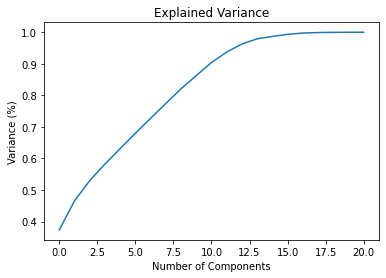

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plot.figure()
plot.plot(np.cumsum(pca.explained_variance_ratio_))
plot.xlabel('Number of Components')
plot.ylabel('Variance (%)') #for each component
plot.title('Explained Variance')
plot.show()

In [ ]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

In [ ]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-0.107512,-0.275885,0.189262,0.011312,-0.212285,-0.018288,0.174626,-0.000193,-0.351883,-0.034751
1,-0.106694,-0.215040,0.301705,0.003406,-0.189600,-0.027324,0.172941,-0.001071,-0.348200,-0.027570
2,-0.106988,-0.293681,0.272838,0.007651,-0.187912,-0.027658,0.171731,-0.000975,-0.346057,-0.027511
3,-0.128044,0.127383,-0.534543,-0.114758,1.503389,-0.182037,-1.156561,-0.080118,2.479087,0.152156
4,-0.107010,-0.293692,0.272828,0.007385,-0.187915,-0.027649,0.171755,-0.000966,-0.346054,-0.027570
...,...,...,...,...,...,...,...,...,...,...
1586962,0.144658,-0.296997,0.270626,0.007559,-0.185122,-0.016572,0.192650,0.011902,-0.336538,-0.068605
1586963,-0.118013,-0.169020,-0.368955,-0.021447,-0.290977,0.274720,-0.185539,0.036960,0.335184,0.244515
1586964,-0.125206,1.434396,-4.763325,0.135431,-0.300832,0.080623,0.300244,0.045353,-0.589224,-0.008358
1586965,-0.068380,-0.261090,0.196130,0.025642,-0.194650,0.055423,0.304938,0.077583,-0.297955,-0.026685


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(principal_x,y,test_size = 0.3)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

In [31]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

In [32]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
Y_pred = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

In [33]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest','Decision Tree', 'Naive Bayes',  
              ],
    'Score': [ acc_log, 
              acc_random_forest,  acc_decision_tree, acc_gaussian]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.96,Random Forest
99.96,Decision Tree
99.31,Logistic Regression
97.63,Naive Bayes


In [37]:
random_forest.score(x_test,y_test)

0.9996702311112792

In [38]:
import pickle

In [39]:
# saving the model to the local file system
filename = 'backorder_model.pickle'
pickle.dump(random_forest, open(filename, 'wb'))

In [40]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(pca.transform([[5,6,8,3,2,9,12,34,8,4,75,2,35,3,5,7,3,12,11,3,2]]))
a

array([1])